<a href="https://colab.research.google.com/github/kushagragpt99/NLP_practice/blob/master/pytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib
import matplotlib.pyplot as plt
import numpy
import random

In [0]:
torch .cuda.is_available()

True

In [0]:
def make_data(num_data):
  data = []
  for n in range(num_data):

    # Generate a random state
    # the distance to the nearest car in front/back/left/right is normalized from 0.0 (closest) to 1.0 (farthest)
    carInFrontDist = random.random()
    carInBackDist = random.random()
    carLeftDist = random.random()
    carRightDist = random.random()

    # Response to the state. 1 =  brakes/accelerator/steer-left/steer-right is activated. 0=not activated
    # Though binary, we will be using numbers
    accel = 1.0
    turn = 0.0

    # Should I accelerate or brake?
    if carInFrontDist < 0.50:
      # Car is close, brake
      # Unless there is another car close behind
      if carInBackDist > 0.50:
        # Okay to brake
        accel = -carInFrontDist/0.50
      else:
        # Not okay to brake, but at least stop accelerating
        accel = 0
    else:
      # Car in front is not close, continue to accelerate
      accel = (carInFrontDist - 0.50)/0.50

    # Should I turn left or right? (can't do both)
    if carLeftDist < 0.5 or carRightDist < 0.5:
      turn = (1.0 - (carLeftDist)) - (1.0 - carRightDist)

    # Store the data
    x = (carInFrontDist, carInBackDist, carLeftDist, carRightDist)
    y = (accel, turn)
    data.append((x, y))
  return data

In [0]:
train_data=make_data(10000)

In [0]:
def get_batch(data, batch_size, index):
  # Get a chunk of data (array of tuples)
  start_index = index * batch_size
  end_index = start_index + batch_size
  batch = data[start_index:end_index]
  # Turn the array into tensors
  batch_inputs = [e[0] for e in batch]
  batch_outputs = [e[1] for e in batch]
  x = torch.tensor(batch_inputs)
  y = torch.tensor(batch_outputs)
  return x, y

In [0]:
x, y = get_batch(train_data, 8, 0)

print('x:')
print(x)
print('shape of x:', x.size())

print('y:')
print(y)
print('shape of y:', y.size())

x:
tensor([[0.2697, 0.7446, 0.2122, 0.4136],
        [0.7441, 0.6434, 0.6442, 0.7092],
        [0.5366, 0.0433, 0.2016, 0.8251],
        [0.9654, 0.3399, 0.9643, 0.4503],
        [0.6988, 0.4455, 0.8345, 0.3043],
        [0.7898, 0.8367, 0.5259, 0.0400],
        [0.9558, 0.8289, 0.7149, 0.0109],
        [0.1136, 0.3920, 0.4853, 0.0216]])
shape of x: torch.Size([8, 4])
y:
tensor([[-0.5393,  0.2014],
        [ 0.4881,  0.0000],
        [ 0.0733,  0.6235],
        [ 0.9308, -0.5140],
        [ 0.3976, -0.5303],
        [ 0.5796, -0.4859],
        [ 0.9117, -0.7040],
        [ 0.0000, -0.4637]])
shape of y: torch.Size([8, 2])


In [0]:
class CarNet(nn.Module):
  
  def __init__(self):
    super(CarNet, self).__init__()
    
    self.linear1=nn.Linear(4,16)
    self.activation1=nn.Tanh()
    self.linear2=nn.Linear(16,8)
    self.activation2=nn.Tanh()
    self.linear3=nn.Linear(8,2)
    self.activation3=nn.Tanh()
    
  def forward(self,x):
    
    h1=self.activation1(self.linear1(x))
    h2=self.activation2(self.linear2(h1))
    y_hat=self.activation3(self.linear3(h2))
    return y_hat
    
    

In [0]:
linear1 = nn.Linear(4, 16)
activation1 = nn.Tanh()

x, _ = get_batch(train_data, 8, 0)

h1 = activation1(linear1(x))
print(h1)
print("shape of h1:", h1.size())

tensor([[-2.3306e-01,  1.9300e-01,  3.3517e-01,  4.4051e-01,  5.7874e-01,
         -1.2013e-01,  4.9304e-02, -5.0900e-01, -1.6001e-01,  1.0193e-01,
         -2.2827e-01, -2.1205e-01, -5.6236e-01, -5.1466e-02,  4.5709e-01,
         -6.1832e-02],
        [-5.7392e-01,  2.8779e-01,  2.4971e-01,  3.9961e-01,  3.8340e-01,
         -1.7474e-01,  1.8791e-01, -5.6142e-01, -2.7155e-01,  2.9827e-01,
          3.2767e-02,  2.7074e-02, -6.7900e-01, -1.1959e-01,  3.9280e-01,
          1.6310e-01],
        [-3.0533e-01,  5.4990e-01,  4.3366e-01,  1.8883e-01,  4.6471e-01,
         -2.3833e-01,  3.9912e-01, -4.8643e-01,  6.0432e-02, -1.5987e-01,
         -2.0122e-02,  2.1463e-01, -3.8227e-01,  1.4819e-02,  4.1454e-01,
          2.7591e-01],
        [-6.6624e-01,  3.4133e-01,  1.5001e-01,  4.4258e-01, -2.9216e-02,
         -5.6656e-02,  3.5370e-01, -4.9976e-01, -3.2019e-01,  3.8154e-01,
          2.6921e-01,  8.8591e-02, -6.9323e-01,  8.9522e-02,  4.8688e-02,
          2.6637e-01],
        [-5.5916e-01

In [0]:
net=CarNet()
if torch.cuda.is_available():
  net=net.to('cuda')
print(net)

CarNet(
  (linear1): Linear(in_features=4, out_features=16, bias=True)
  (activation1): Tanh()
  (linear2): Linear(in_features=16, out_features=8, bias=True)
  (activation2): Tanh()
  (linear3): Linear(in_features=8, out_features=2, bias=True)
  (activation3): Tanh()
)


In [0]:
for i, param in enumerate(net.parameters()):
  print('parameter', i)
  print(param, '\n')

parameter 0
Parameter containing:
tensor([[-0.2550, -0.2123,  0.3803, -0.4705],
        [ 0.4356, -0.1024, -0.4328,  0.1102],
        [ 0.4356,  0.2911,  0.1256,  0.4724],
        [-0.4076, -0.0854, -0.3744, -0.1539],
        [-0.3497,  0.0788,  0.2828,  0.0258],
        [-0.1343, -0.4592,  0.4395, -0.4571],
        [-0.0049,  0.0035,  0.3209, -0.3757],
        [ 0.1036, -0.4268, -0.1434, -0.2568],
        [ 0.3873, -0.1647, -0.1292,  0.3359],
        [ 0.4147, -0.1424, -0.2685,  0.4950],
        [ 0.2864, -0.0347,  0.2984, -0.1712],
        [ 0.3637,  0.1333, -0.2766, -0.2255],
        [ 0.0030,  0.2284, -0.2850, -0.2764],
        [ 0.0899, -0.0989, -0.3271,  0.3667],
        [ 0.1341,  0.2389, -0.4162,  0.1427],
        [ 0.0150,  0.1688, -0.3717,  0.3178]], device='cuda:0',
       requires_grad=True) 

parameter 1
Parameter containing:
tensor([ 0.3910, -0.4626,  0.4232,  0.0981,  0.4763,  0.3017,  0.2458,  0.0609,
         0.1640,  0.0756,  0.2637,  0.4407, -0.3215, -0.2359,  0.2191

In [0]:
optimizer=optim.Adam(net.parameters())

In [0]:
loss_fn=nn.MSELoss()
if torch.cuda.is_available():
  loss_fn=loss_fn.to('cuda')

In [0]:
x,y=get_batch(train_data, 8, 0)

if torch.cuda.is_available():
  x=x.to('cuda')
  y=y.to('cuda')
  
y_hat=net(x)

In [0]:
print(y_hat)
print('Shape of y_hat:', y_hat.size())

tensor([[-0.2127,  0.0452],
        [-0.1869,  0.0409],
        [-0.1888, -0.0008],
        [-0.2012,  0.0731],
        [-0.2150,  0.0830],
        [-0.2129,  0.1012],
        [-0.2107,  0.1120],
        [-0.2505,  0.0911]], device='cuda:0', grad_fn=<TanhBackward>)
Shape of y_hat: torch.Size([8, 2])


In [0]:
loss=loss_fn(y_hat,y)
print(loss)

tensor(0.4183, device='cuda:0', grad_fn=<MseLossBackward>)


In [0]:
y_hat[0][0].item()

-0.2126571536064148

In [0]:
for i, param in enumerate(net.parameters()):
  print('Parameter', i)
  print(param)
  print('gradients:')
  print(param.grad.data, '\n')

Parameter 0
Parameter containing:
tensor([[-0.2560, -0.2133,  0.3793, -0.4715],
        [ 0.4366, -0.1014, -0.4318,  0.1112],
        [ 0.4366,  0.2921,  0.1266,  0.4734],
        [-0.4086, -0.0864, -0.3754, -0.1549],
        [-0.3487,  0.0798,  0.2838,  0.0268],
        [-0.1353, -0.4602,  0.4385, -0.4581],
        [-0.0059,  0.0025,  0.3199, -0.3767],
        [ 0.1026, -0.4278, -0.1444, -0.2577],
        [ 0.3863, -0.1657, -0.1302,  0.3349],
        [ 0.4157, -0.1414, -0.2675,  0.4960],
        [ 0.2854, -0.0357,  0.2974, -0.1722],
        [ 0.3647,  0.1323, -0.2776, -0.2245],
        [ 0.0040,  0.2294, -0.2840, -0.2754],
        [ 0.0909, -0.0979, -0.3261,  0.3677],
        [ 0.1331,  0.2379, -0.4172,  0.1417],
        [ 0.0140,  0.1678, -0.3727,  0.3168]], device='cuda:0',
       requires_grad=True)
gradients:
tensor([[ 0.0229,  0.0142,  0.0191,  0.0099],
        [-0.0121, -0.0094, -0.0118, -0.0018],
        [-0.0034, -0.0030, -0.0037, -0.0002],
        [ 0.0133,  0.0039,  0.0071, 

In [0]:
num_epochs=100
batch_size=8
num_batches=len(train_data)//batch_size
loss_history=[]

net=CarNet()
if torch.cuda.is_available():
  net=net.to('cuda')
optimizer=optim.Adam(net.parameters())
# loss_fun=nn.MSELoss()

# if torch.cuda.is_available():
#   loss_fun=loss_fun.to('cuda')
  
for i in range(num_epochs):
  epoch_loss=0
  
  for j in range(num_batches):
    optimizer.zero_grad()
    x,y=get_batch(train_data, batch_size, j)
    
    if torch.cuda.is_available():
      x=x.to('cuda')
      y=y.to('cuda')
      
    y_hat=net(x)
    loss=loss_fun(y_hat,y)
    epoch_loss+=loss.item()
    loss.backward()
    optimizer.step()
    
  print('epoch', i, 'epoch loss', epoch_loss/num_batches)
  loss_history.append(epoch_loss/num_batches);
    

epoch 0 epoch loss 0.06882514853850007
epoch 1 epoch loss 0.04868429176807403
epoch 2 epoch loss 0.0384831075717695
epoch 3 epoch loss 0.025419864444062114
epoch 4 epoch loss 0.021023339227959514
epoch 5 epoch loss 0.019416765158623457
epoch 6 epoch loss 0.018092637577466666
epoch 7 epoch loss 0.017151362103875727
epoch 8 epoch loss 0.016320354416500777
epoch 9 epoch loss 0.01534248005207628
epoch 10 epoch loss 0.014420087489765138
epoch 11 epoch loss 0.01380841997032985
epoch 12 epoch loss 0.013423612722475081
epoch 13 epoch loss 0.013156526737567037
epoch 14 epoch loss 0.012958292113337665
epoch 15 epoch loss 0.012802122454531491
epoch 16 epoch loss 0.012670034377416596
epoch 17 epoch loss 0.012549217394087464
epoch 18 epoch loss 0.012430632635066287
epoch 19 epoch loss 0.012309151443326847
epoch 20 epoch loss 0.012184208812145516
epoch 21 epoch loss 0.012059268792998045
epoch 22 epoch loss 0.011939386867964641
epoch 23 epoch loss 0.011828398537496105
epoch 24 epoch loss 0.0117277933

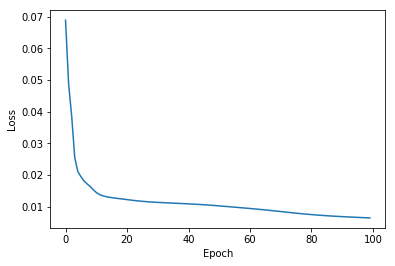

In [0]:
is_python='inline' in matplotlib.get_backend()
if is_python:
  from IPython import display
plt.ion()

plt.figure()
plt.clf()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(numpy.array(loss_history))